                                            Case Study Partners -  AMITH T UMESH & SOUBHIK BANDHYOPADHYAY - DS 26 IIIT-B

# Assignment - Logistic Regression Model - Lead Score Case Study

*About Data*

   - We have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

*Goals of the Case Study*
 
 - Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
 - There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.



In [1]:
# We are supposed to import required python packages to work on the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# let us now import the data set and read it 

from google.colab import files
uploaded = files.upload()

Saving Leads.csv to Leads.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Leads.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Exploratory Data Analysis

In [5]:
# We shall look into the structure of the data by using shape function

df.shape

(9240, 37)

- The data set has 9240 rows and 37 columns

In [6]:
# Information of the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# let us see the null values in our data set

df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# let us have a look into the summary of the data set

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- We can definitely look that there is difference among few variables in their counts 

In [9]:
# We can see there are null values in our data set from the above output,
# Now we shall see the same in the range of percentage of the same.

df_per = round(df.isnull().sum()/len(df)*100.00,2)
df_per.sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Cal

# Data Cleaning

- Before dropping the columns we can understand that 'Lead Quality' column could be one of the significant variable in the analysis. Hence, we may treat it instead of dropping it.

In [10]:
df['Lead Quality'].value_counts(dropna=False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [11]:
df['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

In [12]:
df['Lead Quality'].mode()

0    Might be
dtype: object

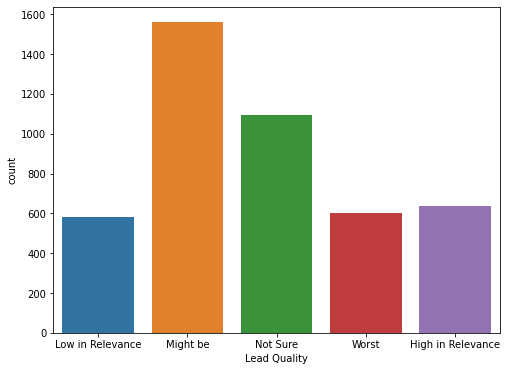

In [13]:
# let us take a visualization of the 'Lead Quality' by using count plot

plt.figure(figsize=[8,6])
sns.countplot(df['Lead Quality'])
plt.show()

- As per the data dictionary, 'Lead Quality' indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead. We may assign the null values with 'Not Sure' though the mode says 'Might be' for the safe action since it is based upon the intution of the employee as well.

In [14]:
df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Not Sure')

In [15]:
df['Lead Quality'].value_counts(dropna=False)

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

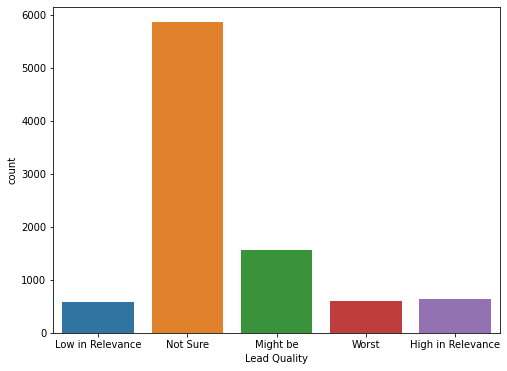

In [16]:
# let us take a visualization of the 'Lead Quality' by using count plot

plt.figure(figsize=[8,6])
sns.countplot(df['Lead Quality'])
plt.show()

In [17]:
# Now we shall see the same in the range of percentage of the same.

df_per = round(df.isnull().sum()/len(df)*100.00,2)
df_per.sort_values(ascending=False)

Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Total Time Spent on Website                       0.00
Converted 

- *As we can see there are null values in our data set and we may drop those variables which are having null values more than 40% of the data set.*

In [18]:
# As per the above strategy we shall drop those columns which are having more than 40% of null values.

# Before that we will write a syntax to sort out columns which are having more than 40% of null values.
df_drop_cols = df_per[df_per>=40]
df_drop_cols.sort_values(ascending=False)  

Asymmetrique Profile Score     45.65
Asymmetrique Activity Score    45.65
Asymmetrique Profile Index     45.65
Asymmetrique Activity Index    45.65
dtype: float64

In [19]:
# Now we are dropping out the columns which is having null values for more than 40%

df_drop = df.drop(columns=df_drop_cols.index)
df_drop.shape

(9240, 33)

- After dropping the columns which were having 40% and more null values we are  left with 33 columns from 37 columns

### *Now let us check for more filtering. Since, we know that the variables with independent indicators having no duplicates such as ID numbers or unique identity values has no significant role in our analysis. Hence, we may drop any such columns for more compact view of our data output.*

In [20]:
# As per the above idea we shall look into such variables having duplicates are not

sum(df_drop.duplicated(subset = 'Prospect ID'))==0

True

- There is no duplicate in the column 'Prospect ID'

In [21]:
sum(df_drop.duplicated(subset = 'Lead Number'))==0

True

- There is no duplicate in the column 'Lead Number'

In [22]:
# We are dropping those columns mentioned in the above 

df_drop.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [23]:
df_drop.shape

(9240, 31)

- After dropping the columns we have checked for the same i.e. 31 columns from 32.

In [24]:
# We are looking at the info again.

df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [25]:
# Let us look the info in the range of percentage.

df_per = round(df_drop.isnull().sum()/len(df_drop)*100.00,2)
df_per.sort_values(ascending=False)

Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
Magazine                                          0.00
Search    

In [26]:
df_drop.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [27]:
df_drop.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## *Value Count function to analyse number of uniqueness in the columns.*

In [28]:
# we need to check the unique value for few column

# City

df_drop.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [29]:
# Lead Profile

df_drop['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [30]:
# How did you hear about X Education

df_drop['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [31]:
# Specialization

df_drop['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

## $Inference$

### *Now that we have checked on few variables or columns for the uniqueness by value_count function. We can definitely see there is some unique value named 'Select' common in all the columns.*

### *It doesn't mean that all that 'Select' values in the common have some value. It is basically referred that the 'Select' value is nothing but when customers those who have not selected any of the options provided during filling the applications.*

### *In such case the 'Select' values can be considered equally as Null values in our data set. Hence, we may convert all such values into Null values using replace command.*

In [32]:
# As per the above understanding, we are now about to convert 'Select' values to Null Values.

df_drop = df_drop.replace('Select', np.nan)

In [33]:
# Let us check the changes has taken it's effect in the data 

df_drop.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [34]:
# Let us look the info in the range of percentage.

df_per = round(df_drop.isnull().sum()/len(df_drop)*100.00,2)
df_per.sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Converted                                         0.00
Do Not Call                                       0.00
Total Time Spent on Website                       0.00
Do Not Email                                      0.00
Last Notable Activity                             0.00
Magazine                                          0.00
Search    

- Now we can see drastic changes in our Null values after converting 'Select' values in our data set. And we may again drop such columns which are having null values more than 40%.

In [35]:
# As per the above strategy we shall drop those columns which are having more than 40% of null values.

# Before that we will write a syntax to sort out columns which are having more than 40% of null values.
df_drop_cols = df_per[df_per>=40]
df_drop_cols.sort_values(ascending=False)  

How did you hear about X Education    78.46
Lead Profile                          74.19
dtype: float64

In [36]:
df_drop.shape

(9240, 31)

In [37]:
# Now we are dropping out the columns which is having null values for more than 40%

df_drop = df_drop.drop(columns=df_drop_cols.index)
df_drop.shape

(9240, 29)

- We have dropped two columns having more than 40% null values in the data and now the numbers of total columns after dropping is 29 from 30.

In [38]:
# Let us look the info in the range of percentage.

df_per = round(df_drop.isnull().sum()/len(df_drop)*100.00,2)
df_per.sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Magazine                                          0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Newspaper 

### Now, let us check to treat other columns still having null values in our data set.

In [39]:
# From the above descending order of the null values, we shall treat one by one accordingly.

# Let us check on 'City' column by using value_count function.

df_drop['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

- We can see that there are 3669 null values in 'City' column

In [40]:
df_drop['City'].mode()

0    Mumbai
dtype: object

- We have seen the mode of the 'City' column and it is found to be 'Mumbai' and we shall replace the null values with the mode value.

In [41]:
df_drop['City'] = df_drop['City'].replace(np.nan,'Mumbai')
df_drop['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

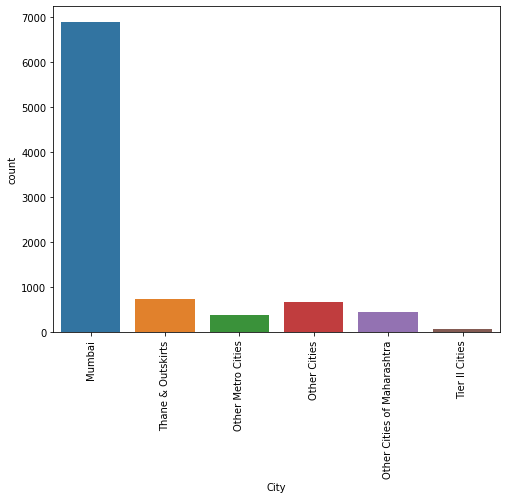

In [42]:
# Count Plot for 'City'

plt.figure(figsize=[8,6])
sns.countplot(df_drop['City'])
plt.xticks(rotation=90)
plt.show()

- We have successfully replaced the null values in the 'City' column with mode value.

In [43]:
# Let us check on 'Specialization' column by using value_count function.

df_drop['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [44]:
df_drop['Specialization'].mode()

0    Finance Management
dtype: object

- Instead of replacing the null values with mode or dropping the null values , here let us assume that the specialization most probabaly was not mentioned during the leads and also considering the null values are far higher than mode. We shall replace the null values with 'Unspecified' value  since it is very significant variable for our business understanding.

In [45]:
# We are replacing null values in the 'Specialization' column with 'Unspecified'

df_drop['Specialization'] = df_drop['Specialization'].replace(np.nan, 'Unspecified')

In [46]:
# Let us check on 'Specialization' column by using value_count function.

df_drop['Specialization'].value_counts(dropna=False)

Unspecified                          3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

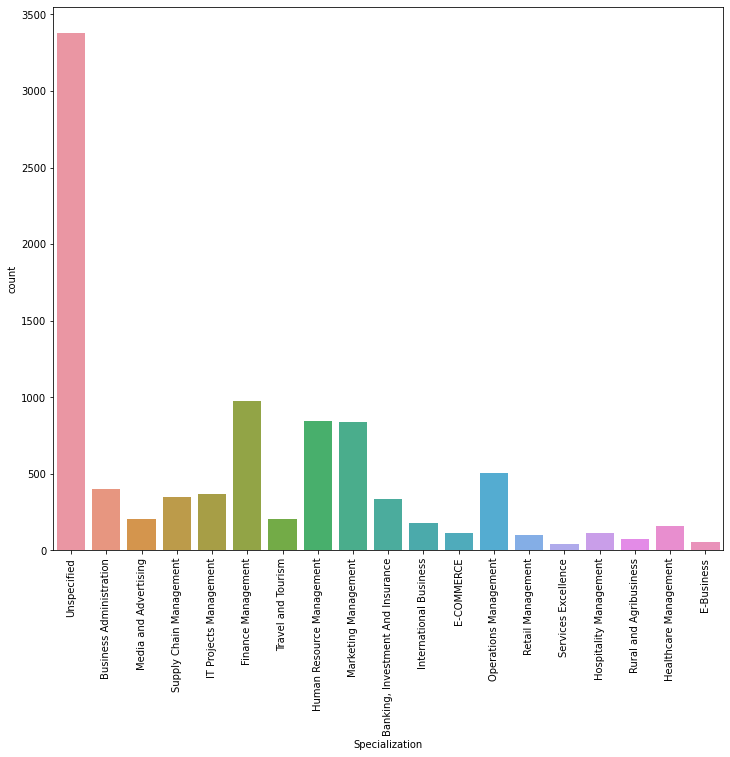

In [47]:
# Count Plot for 'Specialization'

plt.figure(figsize=[12,10])
sns.countplot(df_drop['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [48]:
# We are making column list for having 'Management' in the value

buck_col = []
for i in df_drop['Specialization']:
  if 'Management' in i:
    buck_col.append(i)

In [49]:
# Since there are common management courses in the specialization, we can bucket all those into one category for better output.

df_drop['Specialization'] = df_drop['Specialization'].replace([buck_col], 'Management_Specializations')

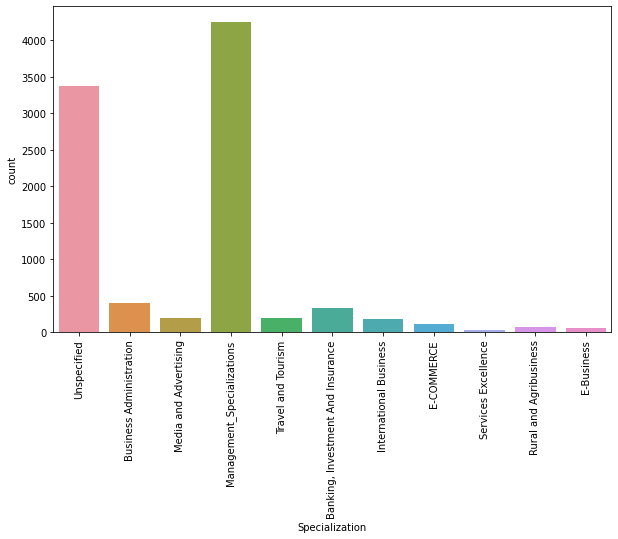

In [50]:
# Count Plot for 'Specialization'

plt.figure(figsize=[10,6])
sns.countplot(df_drop['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [51]:
# Let us check on 'Specialization' column by using value_count function.

df_drop['Specialization'].value_counts(dropna=False)

Management_Specializations           4253
Unspecified                          3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [52]:
# let us deal same with 'Tags' column

df_drop['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [53]:
df_drop['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [54]:
# We shall replace the null values in 'Tags' column with mode value

df_drop['Tags'].mode()

0    Will revert after reading the email
dtype: object

In [55]:
df_drop['Tags'] = df_drop['Tags'].replace(np.nan, 'Will revert after reading the email')

In [56]:
df_drop['Tags'].value_counts(dropna=False)

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

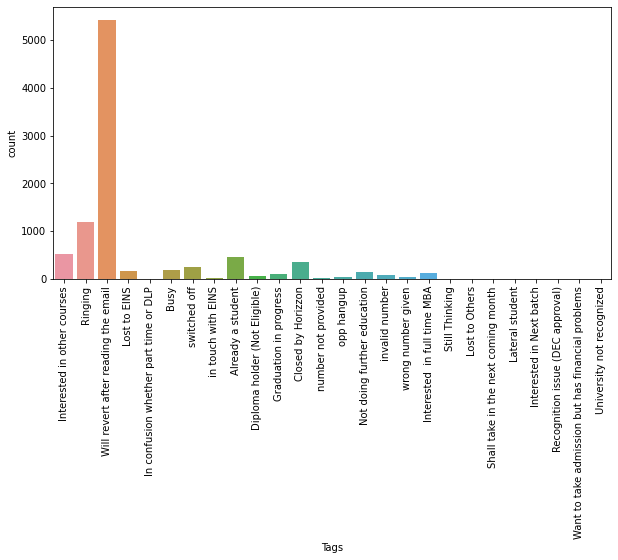

In [57]:
# Count Plot for 'Tags'

plt.figure(figsize=[10,5])
sns.countplot(df_drop['Tags'])
plt.xticks(rotation=90)
plt.show()

In [58]:
df_drop['Tags'].unique()

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [59]:
# Let us bin the values into common value, which are having very low counts in the above plot.

# before that we shall make a list of such columns.

bin_cols = ['In confusion whether part time or DLP', 'in touch with EINS',
            'Diploma holder (Not Eligible)', 'Graduation in progress',
            'number not provided', 'opp hangup',
            'Not doing further education', 'invalid number',
            'wrong number given', 'Interested  in full time MBA',
            'Still Thinking', 'Lost to Others',
            'Shall take in the next coming month', 'Lateral student',
            'Interested in Next batch', 'Recognition issue (DEC approval)',
            'Want to take admission but has financial problems',
            'University not recognized' ]

df_drop['Tags']= df_drop['Tags'].replace([bin_cols], 'Miscellaneous_Tags')

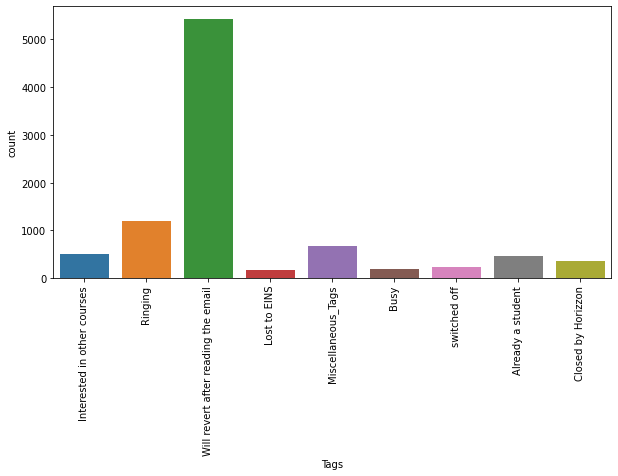

In [60]:
# Count Plot for 'Tags'

plt.figure(figsize=[10,5])
sns.countplot(df_drop['Tags'])
plt.xticks(rotation=90)
plt.show()

In [61]:
# Let us check on 'Tags' column by using value_count function.

df_drop['Tags'].value_counts(dropna=False)

Will revert after reading the email    5425
Ringing                                1203
Miscellaneous_Tags                      675
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Name: Tags, dtype: int64

In [62]:
# Let us look the info in the range of percentage.

df_per = round(df_drop.isnull().sum()/len(df_drop)*100.00,2)
df_per.sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Search                                            0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Specialization                                    0.00
Magazine                                          0.00
A free copy of Mastering The Interview            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [63]:
# What matters most to you in choosing a course

df_drop['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [64]:
df_drop['What matters most to you in choosing a course'].mode()

0    Better Career Prospects
dtype: object

In [65]:
# Let us replace the null values with the mode value and which also makes sense in the context for students chosing the course.

df_drop['What matters most to you in choosing a course'] = df_drop['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [66]:
df_drop['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

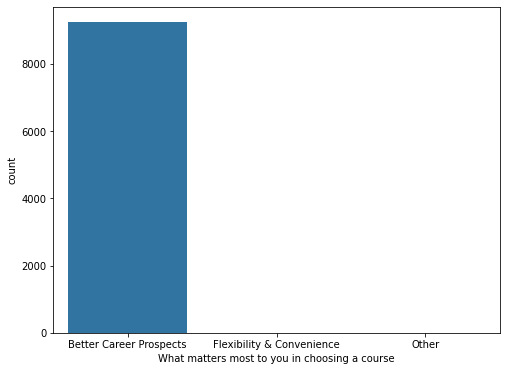

In [67]:
# Count Plot for 'What matters most to you in choosing a course'

plt.figure(figsize=[8,6])
sns.countplot(df_drop['What matters most to you in choosing a course'])
plt.show()

- It is very common that most of the students often choose courses for better career prospects.

In [68]:
# What is your current occupation

df_drop['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [69]:
df_drop['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [70]:
df_drop['What is your current occupation'].mode()

0    Unemployed
dtype: object

- It is common that most of the students are not employed and we shall take a decesion to replace the null value with mode value i.e. 'Unemployed'.

In [71]:
# We are replacing the null values as mentioned above

df_drop['What is your current occupation'] = df_drop['What is your current occupation'].replace(np.nan, 'Unemployed')

In [72]:
df_drop['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

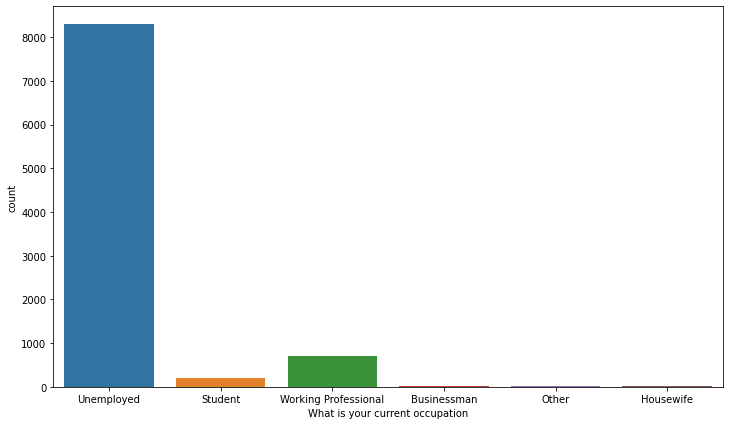

In [73]:
# Count Plot for 'What is your current occupation'

plt.figure(figsize=[12,7])
sns.countplot(df_drop['What is your current occupation'])
plt.show()

In [74]:
# Let us look the info in the range of percentage.

df_per = round(df_drop.isnull().sum()/len(df_drop)*100.00,2)
df_per.sort_values(ascending=False)

Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Search                                            0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Magazine                                          0.00
A free copy of Mastering The Interview            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [75]:
# Now we are looking out for 'Country'

df_drop['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
Canada                     4
Nigeria                    4
South Africa               4
Kuwait                     4
Sweden                     3
China                      2
Philippines                2
Belgium                    2
Bangladesh                 2
Netherlands                2
Ghana                      2
Italy                      2
Uganda                     2
Asia/Pacific Region        2
Kenya                      1
Sri Lanka                  1
Indonesia                  1
Malaysia                   1
Tanzania                   1
Denmark       

In [76]:
df_drop['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [77]:
df_drop['Country'].mode()

0    India
dtype: object

- Here it is obvious that we need to replace the null values with the mode value i.e. India

In [78]:
df_drop['Country'] = df_drop['Country'].replace(np.nan, 'India')

In [79]:
df_drop['Country'].value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
Canada                     4
Nigeria                    4
Kuwait                     4
South Africa               4
Sweden                     3
China                      2
Belgium                    2
Asia/Pacific Region        2
Uganda                     2
Philippines                2
Italy                      2
Bangladesh                 2
Ghana                      2
Netherlands                2
Vietnam                    1
Denmark                    1
Sri Lanka                  1
Malaysia                   1
Indonesia                  1
Tanzania                   1
Kenya         

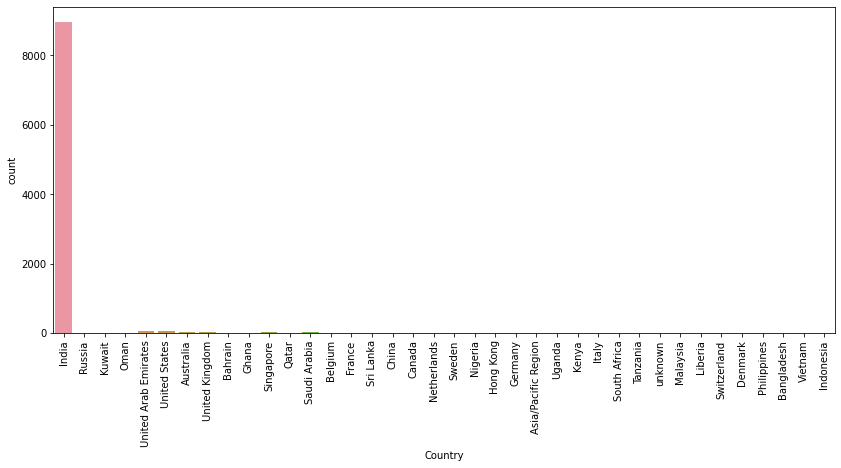

In [80]:
# Count Plot for 'Country'

plt.figure(figsize=[14,6])
sns.countplot(df_drop['Country'])
plt.xticks(rotation=90)
plt.show()

In [81]:
# Let us look the info in the range of percentage.

df_per = round(df_drop.isnull().sum()/len(df_drop)*100.00,2)
df_per.sort_values(ascending=False)

TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Last Notable Activity                            0.00
Search                                           0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Magazine                                         0.00
A free copy of Mastering The Interview           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [82]:
df_drop.shape

(9240, 29)

In [83]:
# Now that we are having very less amount of null values in our data set and hence we may drop those null values

df_drop.dropna(inplace=True)

In [84]:
df_drop.shape

(9074, 29)

In [85]:
# Let us look the info in the range of percentage.

df_per = round(df_drop.isnull().sum()/len(df_drop)*100.00,2)
df_per.sort_values(ascending=False)

Last Notable Activity                            0.0
Search                                           0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Magazine                                         0.0
A free copy of Mastering The Interview           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

### *So we have now successfully filtered all the null values in our data set and we can witness the same in the above output.*

## Univariate Analysis

In [86]:
df_drop.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [87]:
# Our target variable is 'Converted' which says whether the lead is converted into enrollment or not

df_drop['Converted'].value_counts(dropna=False)

0    5639
1    3435
Name: Converted, dtype: int64

- There are 3435 converted leads and 5639 not converted leads as per the given data.

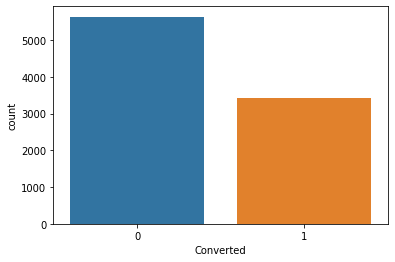

In [88]:
sns.countplot(df_drop['Converted'])
plt.show()

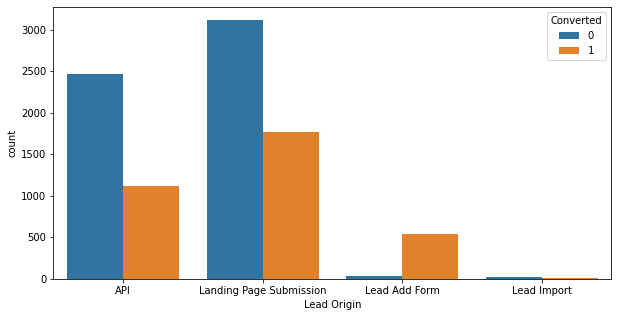

In [89]:
# Let us make an univariate analysis for our variables.

# Lead Origin

plt.figure(figsize=[10,5])
sns.countplot(x='Lead Origin', hue= 'Converted', data= df_drop)
plt.show()

> With reference to the above plot our inferences are, the 'API' and 'Landing Page Submission' has 50% lesser conversion and whereas 'Lead Add Form' has almost more than 90% conversion rate. Finally 'Lead Import' has very lesser rate of conversions. 

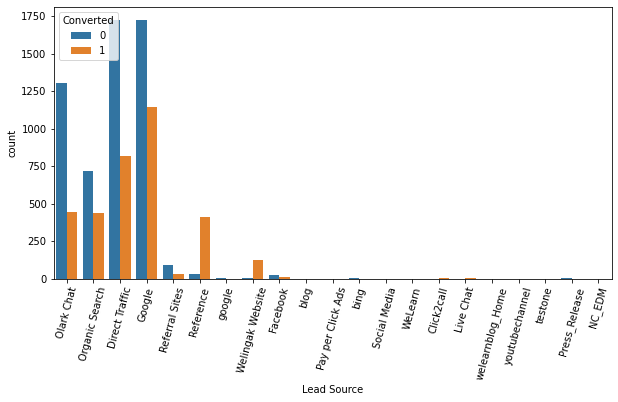

In [90]:
# Lead Source

plt.figure(figsize=[10,5])
sns.countplot(x='Lead Source', hue= 'Converted', data= df_drop)
plt.xticks(rotation=75)
plt.show()

- By looking into the above plot we can say that the plot is not so compatible to analyse. We can also see that there are 2 'Google' which we may make it as one.
-  We can also see that in the plot after facebook the rates are very less and we can bucket all of them into misceleneous source. 

In [91]:
# we are converting 'google' to 'Google' in 'Lead Source'

df_drop['Lead Source'] = df_drop['Lead Source'].replace(['google'], 'Google')

In [92]:
df_drop['Lead Source'].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

In [93]:
# Now let us bucket the values into common category which are having very less rating in the above plot.

df_drop['Lead Source'] = df_drop['Lead Source'].replace(['blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], 'Miscellaneous Source')

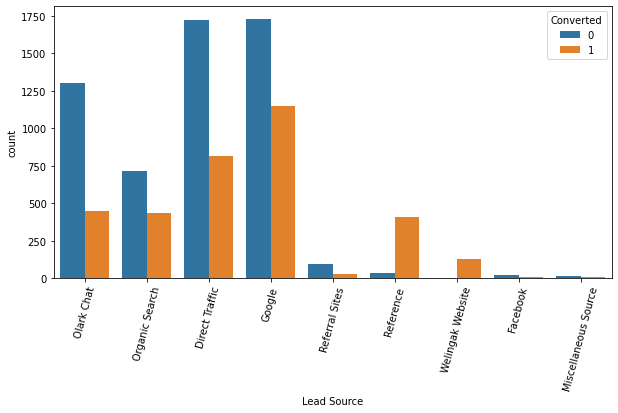

In [94]:
# Now we shall plot the count plot for the 'Lead Source' after the changes made.

# Lead Source

plt.figure(figsize=[10,5])
sns.countplot(x='Lead Source', hue= 'Converted', data= df_drop)
plt.xticks(rotation=75)
plt.show()

- From the above plot, we can easily make out that except 'Reference' and 'Welingak Website' all the other categories in the 'Lead Source' has lesser conversion rates.

In [95]:
df_drop.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

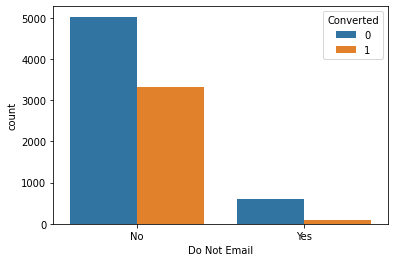

In [96]:
# let us look at the count plot for 'Do Not Email'

sns.countplot(x='Do Not Email', hue = 'Converted', data = df_drop)
plt.show()

- The above plot tells us that most of them has chosen not to receive email. Anyways, both the case the conversion rate is lesser.

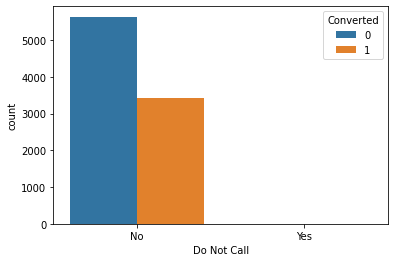

In [97]:
# let us look at the count plot for 'Do Not Call'

sns.countplot(x='Do Not Call', hue = 'Converted', data = df_drop)
plt.show()

In [98]:
df_drop['Do Not Call'].value_counts(dropna=False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

- The above output says that the users have preferred almost not to receive calls because it is almost null. 2 out of 9074.

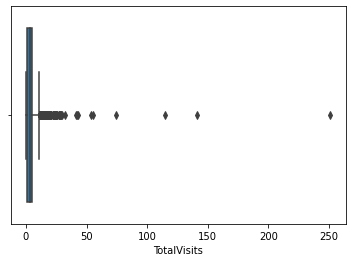

In [99]:
# Now we shall look out for the 'TotalVisits'

# Since 'TotalVisits' is not a categorical column we shall use box plot to visualize it.

sns.boxplot(df_drop['TotalVisits'])
plt.show()

- So here we can see that there are some outliers in the variables.

In [100]:
# Lets us use scale under describe function to see where the outlier lies in the 'TotalVisits' variable.

df_drop['TotalVisits'].describe(percentiles=[0.05,0.1,0.20,0.25,0.30,0.40,0.50,0.60,0.70,0.75,0.80,0.90,0.95,0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
25%         1.000000
30%         2.000000
40%         2.000000
50%         3.000000
60%         3.000000
70%         4.000000
75%         5.000000
80%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [101]:
# To remove the outlier we have used below function and plot the box again to see the difference from previous boxplot.

df_drop=df_drop[df_drop.TotalVisits<np.nanpercentile(df_drop['TotalVisits'], 99)]

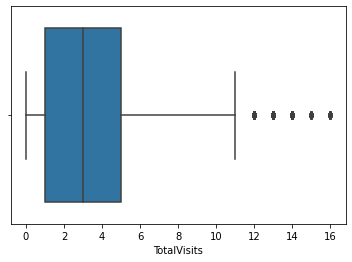

In [102]:
sns.boxplot(df_drop['TotalVisits'])
plt.show()

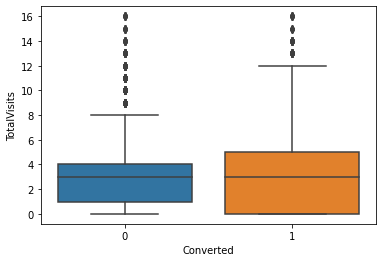

In [103]:
# Now we are plotting the same boxplot along with the target variable.

sns.boxplot(x='Converted',y='TotalVisits', data= df_drop)
plt.show()

- From the above plot we can see that median for the both converted and not converted are same.

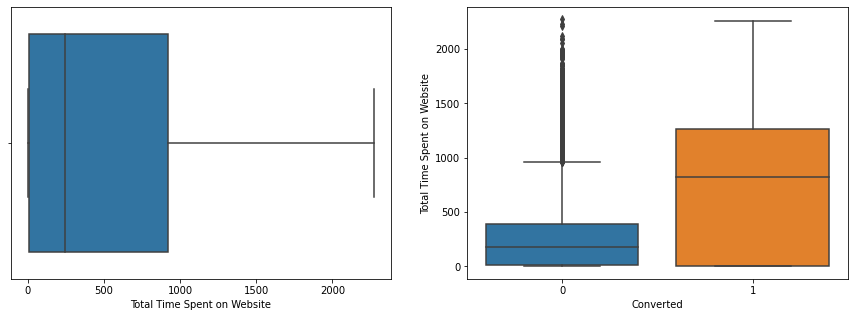

In [104]:
# Total Time Spent on Website

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(df_drop['Total Time Spent on Website'])
plt.subplot(1,2,2)
sns.boxplot(x='Converted',y='Total Time Spent on Website',data = df_drop)
plt.show()

- From the above plot we can infer and say that there are more conversion rate those who spend  time on websites. Probably it may be because of information available on the websites. 

In [105]:
df_drop.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

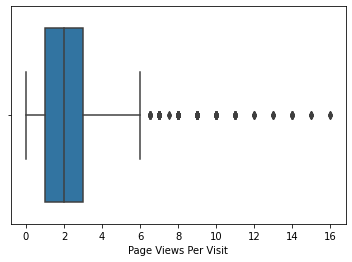

In [106]:
# 'Page Views Per Visit'

sns.boxplot(df_drop['Page Views Per Visit'])
plt.show()

In [107]:
# To remove the outlier we have used below function and plot the box again to see the difference from previous boxplot.

df_drop=df_drop[df_drop['Page Views Per Visit']<np.nanpercentile(df_drop['Page Views Per Visit'], 99)]

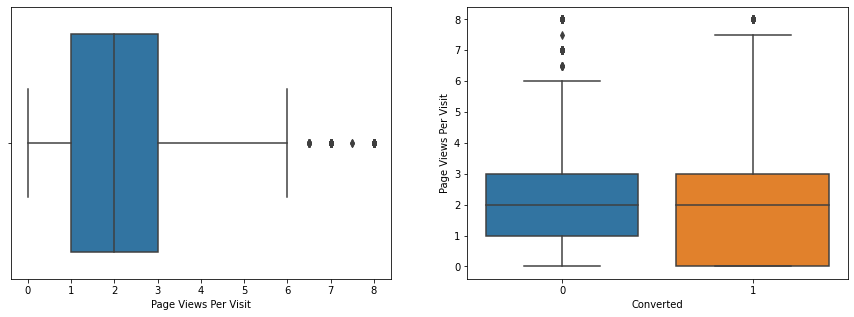

In [108]:
# Page Views Per Visit with target variable.

plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.boxplot(df_drop['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.boxplot(x='Converted',y='Page Views Per Visit',data = df_drop)
plt.show()

- The median for both converted and not converted for the 'Page Views Per Visit' are same.

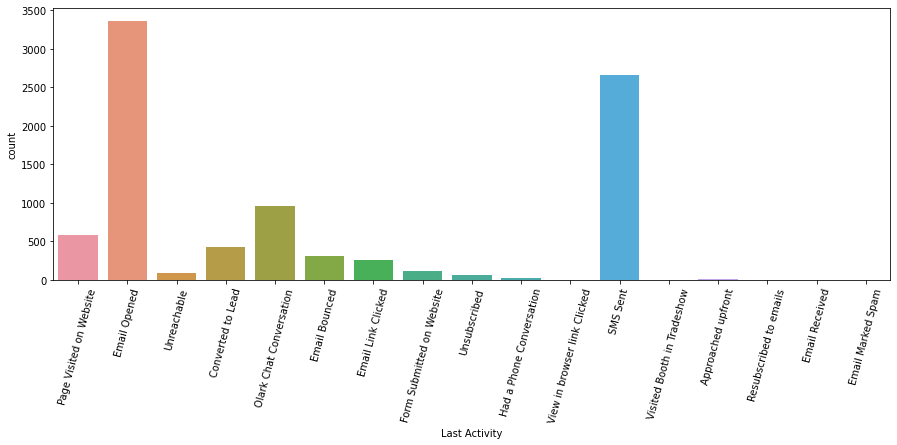

In [109]:
# Last Activity

plt.figure(figsize=[15,5])
sns.countplot(df_drop['Last Activity'])
plt.xticks(rotation=75)
plt.show()

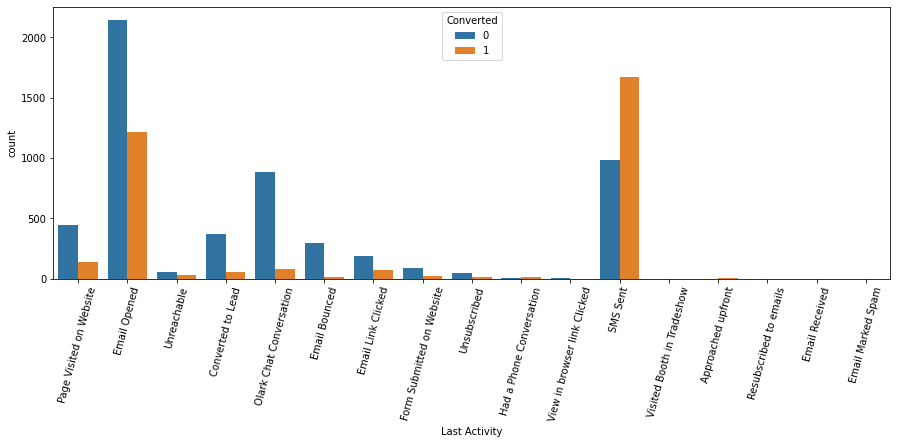

In [110]:
plt.figure(figsize=[15,5])
sns.countplot('Last Activity', hue = 'Converted', data = df_drop)
plt.xticks(rotation=75)
plt.show()

In [111]:
df_drop['Last Activity'].unique()

array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'SMS Sent', 'Visited Booth in Tradeshow', 'Approached upfront',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [112]:
# Let us bin the values into common value which are having very less counts in the above plot.

# before that we shall make list out of such values.

bin_las = ['Unreachable','Unsubscribed','Had a Phone Conversation', 
           'View in browser link Clicked','Visited Booth in Tradeshow', 
           'Approached upfront','Resubscribed to emails', 'Email Received', 
           'Email Marked Spam']

df_drop['Last Activity'] = df_drop['Last Activity'].replace([bin_las], 'Other_Activities')

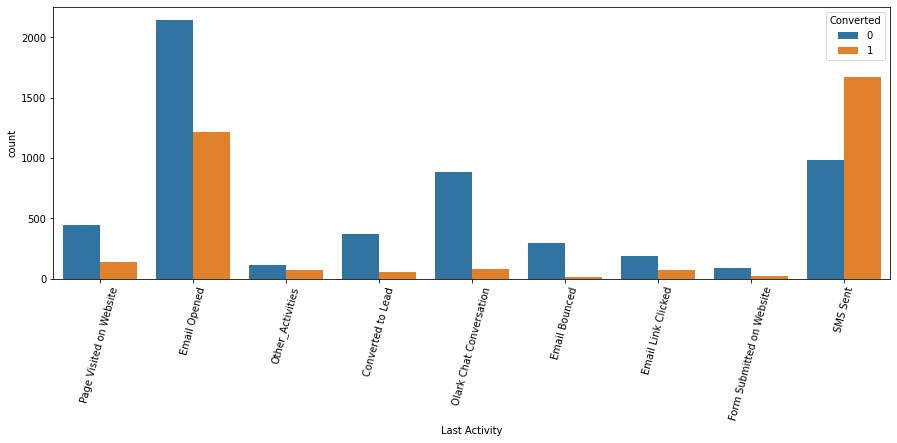

In [113]:
# Count plot of 'Last Activity' after binning values.

plt.figure(figsize=[15,5])
sns.countplot('Last Activity', hue = 'Converted', data = df_drop)
plt.xticks(rotation=75)
plt.show()

- from the above plot only SMS Sent has more conversion rate and email opened has the highest not converted rate.

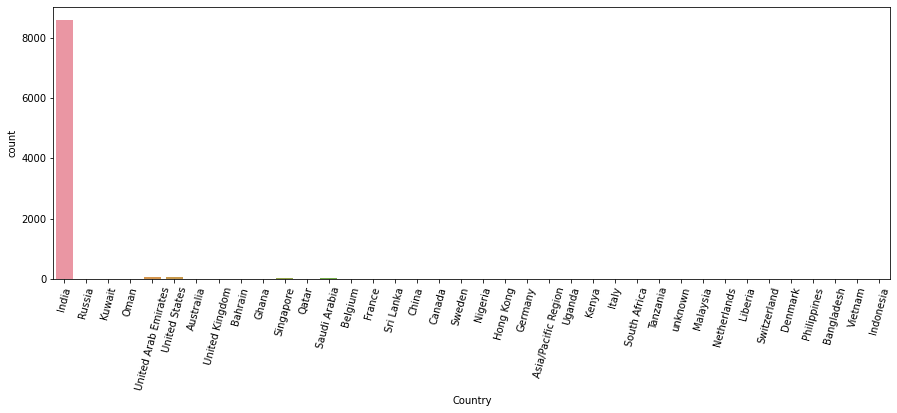

In [114]:
# Country

plt.figure(figsize=[15,5])
sns.countplot(df_drop['Country'])
plt.xticks(rotation=75)
plt.show()

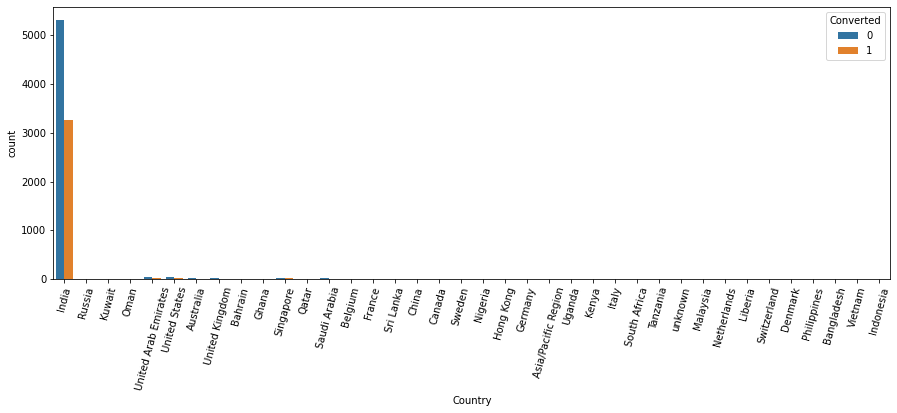

In [115]:
plt.figure(figsize=[15,5])
sns.countplot('Country', hue = 'Converted', data = df_drop)
plt.xticks(rotation=75)
plt.show()

- Only India has most of the values and cannot be inferred anything excatly from the information. 

In [116]:
df_drop.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

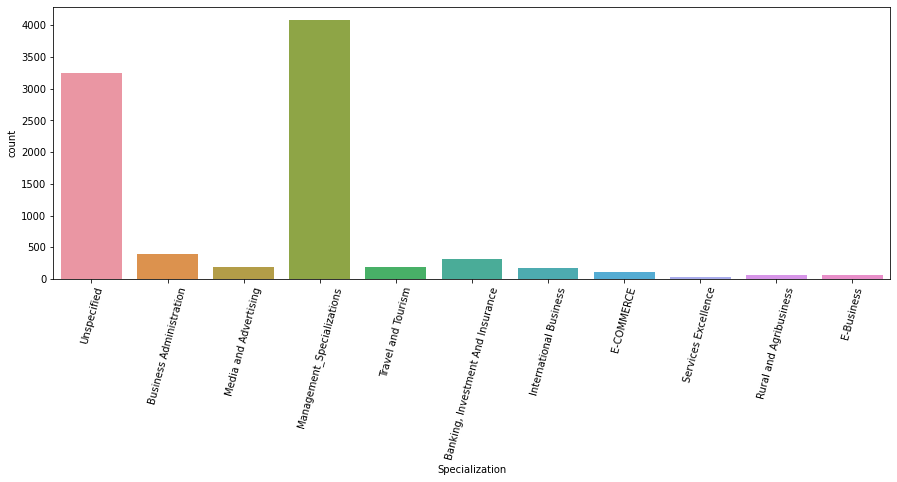

In [117]:
# 'Specialization'

plt.figure(figsize=[15,5])
sns.countplot(df_drop['Specialization'])
plt.xticks(rotation=75)
plt.show()

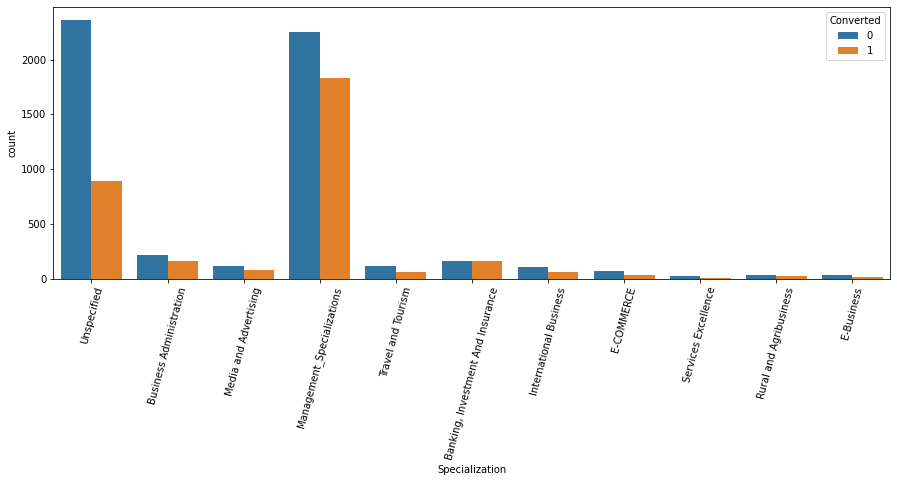

In [118]:
plt.figure(figsize=[15,5])
sns.countplot('Specialization', hue = 'Converted', data = df_drop)
plt.xticks(rotation=75)
plt.show()

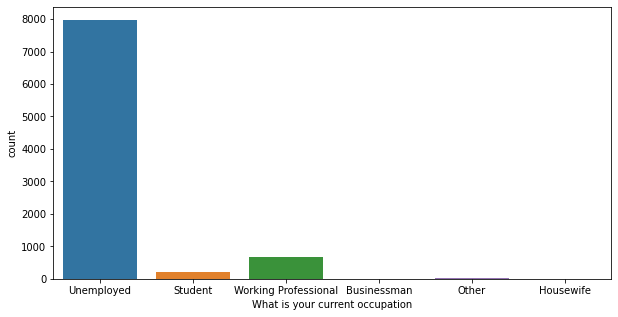

In [119]:
# 'What is your current occupation'

plt.figure(figsize=[10,5])
sns.countplot(df_drop['What is your current occupation'])
plt.show()

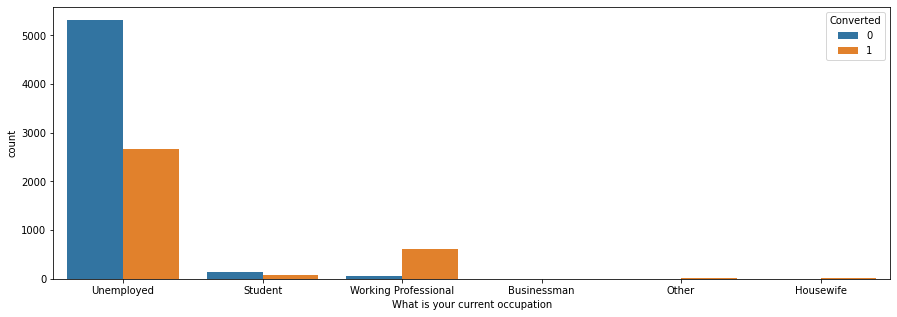

In [120]:
plt.figure(figsize=[15,5])
sns.countplot('What is your current occupation', hue = 'Converted', data = df_drop)
plt.show()

- It seems like working professional tend to be getting converted more according to the above output.

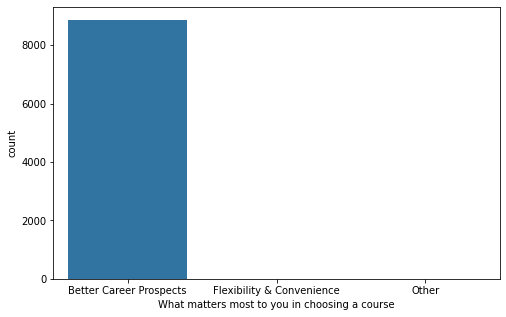

In [121]:
# What matters most to you in choosing a course

plt.figure(figsize=[8,5])
sns.countplot(df_drop['What matters most to you in choosing a course'])
plt.show()

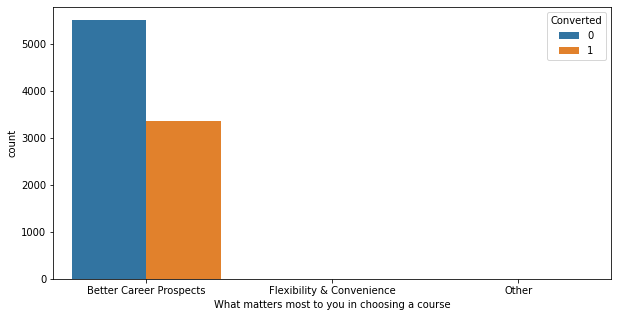

In [122]:
plt.figure(figsize=[10,5])
sns.countplot('What matters most to you in choosing a course', hue = 'Converted', data = df_drop)
plt.show()

- Most of the course activity is belonged for the commom motive i.e. for Better Career Prospectives.

In [123]:
df_drop.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [124]:
#Search

df_drop.Search.describe()

count     8863
unique       2
top         No
freq      8850
Name: Search, dtype: object

In [125]:
df_drop.Search.unique()

array(['No', 'Yes'], dtype=object)

In [126]:
# Let us see the surface details of few columns together by describe function.

col_list =['Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
        'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview',]

In [127]:
df_drop[col_list].describe()

,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,8863,8863,8863,8863,8863,8863,8863,8863,8863,8863,8863
unique,1,1,1,2,2,2,1,1,1,1,2
top,No,No,No,No,No,No,No,No,No,No,No
freq,8863,8863,8863,8862,8861,8857,8863,8863,8863,8863,6103


## Inferences from the above output

- Most of the columns in the data set are having only 'No'. Those are 'Magazine', 'Newspaper Article', 'X Education Forums', 'Receive More Updates about the Courses', 'Update me on Supply Chain Content', Get updates on DM Content', 'I agree to pay the amount through cheque'.

- Rest of the columns from the above column list are having both 'Yes' and 'No'. But still it is all having 'No' as a top.

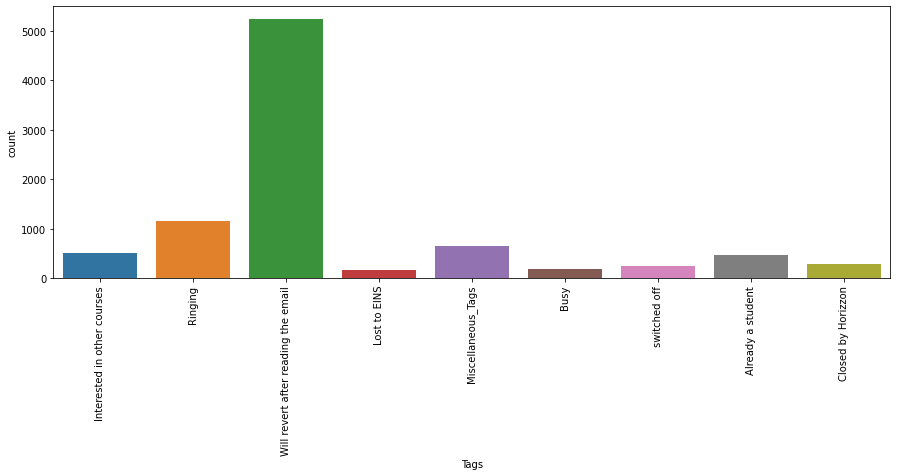

In [128]:
# Tags

plt.figure(figsize=[15,5])
sns.countplot(df_drop['Tags'])
plt.xticks(rotation=90)
plt.show()

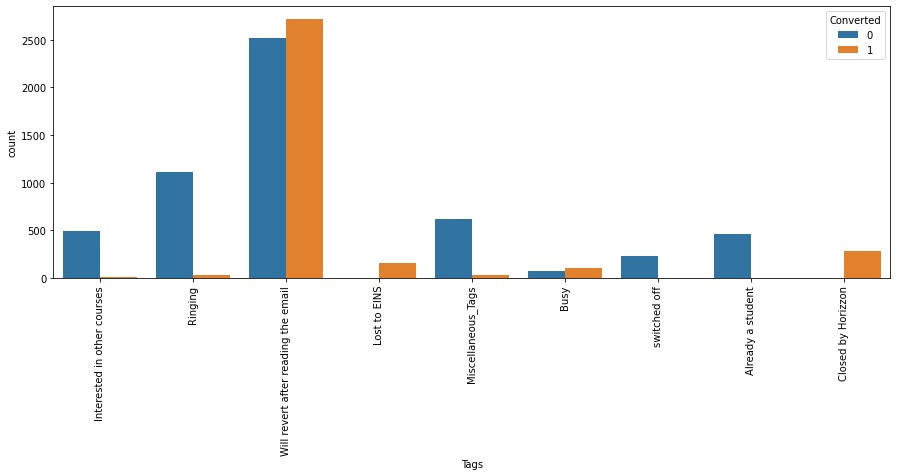

In [129]:
plt.figure(figsize=[15,5])
sns.countplot('Tags', hue = 'Converted', data = df_drop)
plt.xticks(rotation=90)
plt.show()

- 'Will revert after reading the email' has higher conversion rate compared.

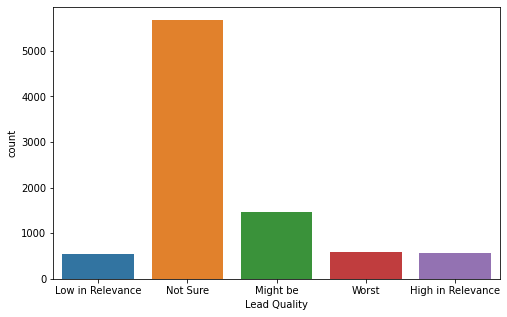

In [130]:
# Lead Quality

plt.figure(figsize=[8,5])
sns.countplot(df_drop['Lead Quality'])
plt.show()

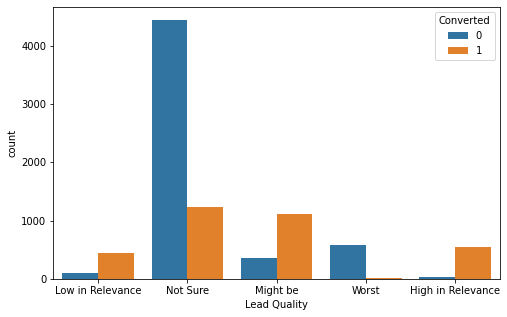

In [131]:
plt.figure(figsize=[8,5])
sns.countplot('Lead Quality', hue = 'Converted', data = df_drop)
plt.show()

- Low in Relevance, Might be Lead Quality and High in Relevance are showing more conversion rate.

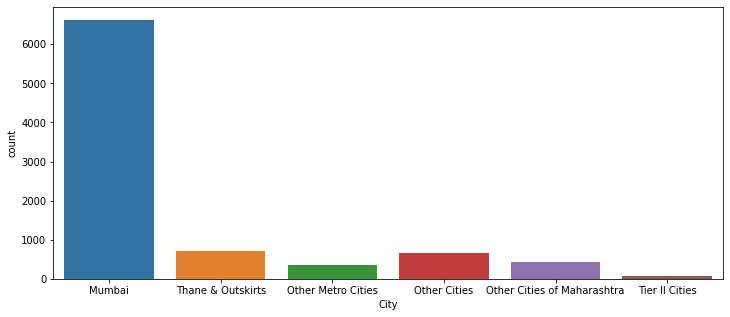

In [132]:
# City

plt.figure(figsize=[12,5])
sns.countplot(df_drop['City'])
plt.show()

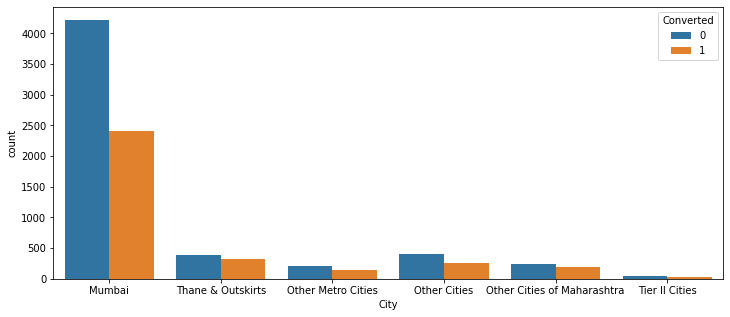

In [133]:
plt.figure(figsize=[12,5])
sns.countplot('City', hue='Converted', data = df_drop)
plt.show()

- Mumbai has most of the leads.

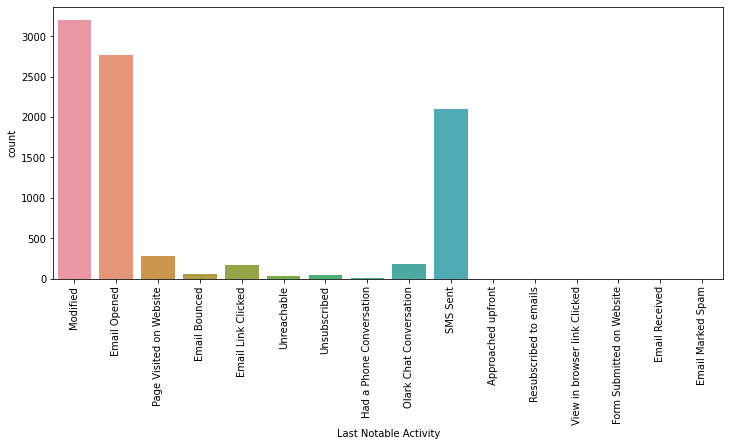

In [134]:
# Last Notable Activity

plt.figure(figsize=[12,5])
sns.countplot(df_drop['Last Notable Activity'])
plt.xticks(rotation=90)
plt.show()

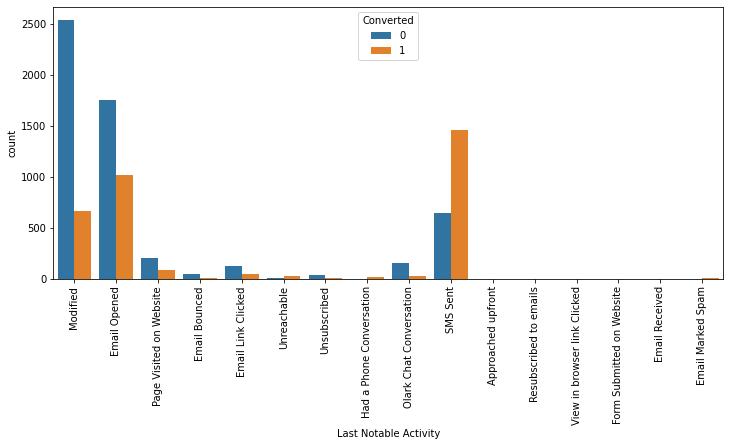

In [135]:
plt.figure(figsize=[12,5])
sns.countplot('Last Notable Activity',hue='Converted',data = df_drop)
plt.xticks(rotation=90)
plt.show()

- SMS sent has a decent conversion rate according to the output.

## Preparation of the Data for Modelling

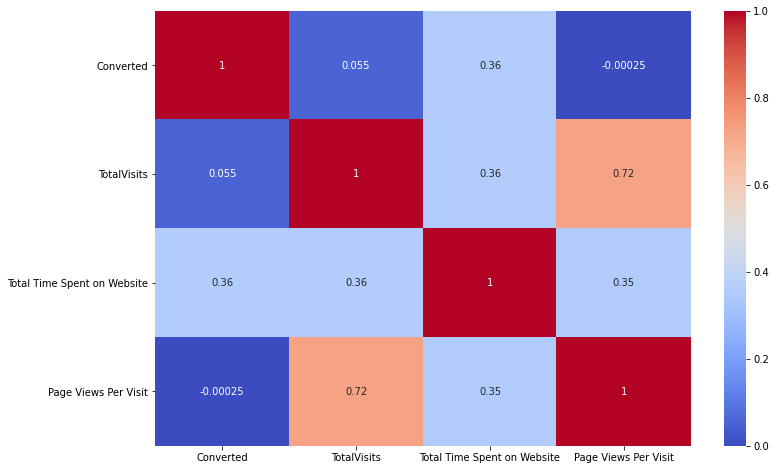

In [136]:
# Heat map to see the correlation between the variables

plt.figure(figsize=[12,8])
sns.heatmap(df_drop.corr(), annot=True, cmap='coolwarm')
plt.show()

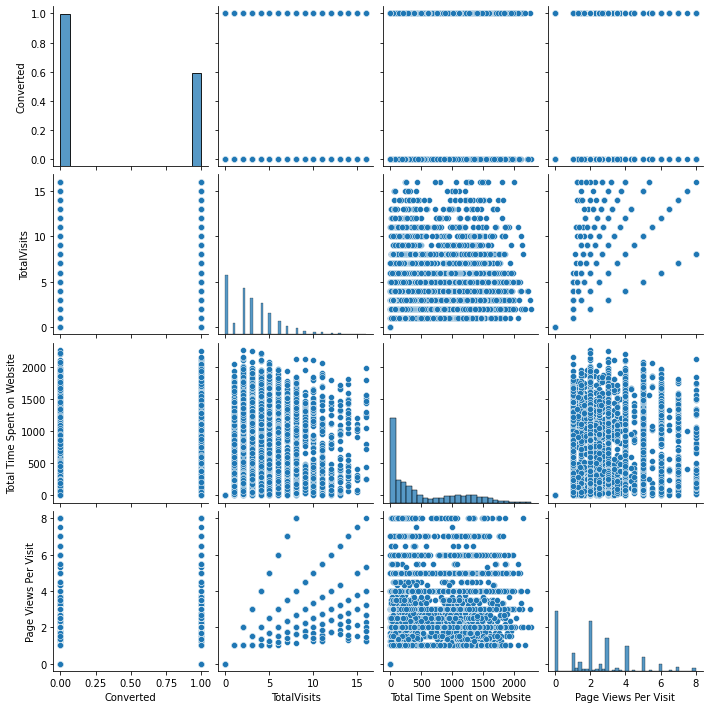

In [137]:
# Pairplot for visulization

sns.pairplot(df_drop)
plt.show()

In [138]:
df_drop.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8863.000000,8863.000000,8863.000000,8863.000000
mean,0.378089,3.098387,478.122193,2.236941
std,0.484937,2.821961,544.532372,1.835885
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,5.000000,1.000000
50%,0.000000,3.000000,240.000000,2.000000
75%,1.000000,4.000000,913.000000,3.000000
max,1.000000,16.000000,2272.000000,8.000000


In [139]:
df_drop.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Other_Activities,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unspecified,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


### Let us drop few columns which are not so important for our model building or analysis

In [140]:
df_drop.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [141]:
to_drop_cols = ['Country','What matters most to you in choosing a course','Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses','Update me on Supply Chain Content', 
       'Get updates on DM Content', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview']

In [142]:
df_drop = df_drop.drop(columns=to_drop_cols)

In [143]:
df_drop.shape

(8863, 15)

In [144]:
df_drop.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Other_Activities,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


- Now we need to make necessary changes

1. Label 'Yes' : 1 and 'No' : 0 in 'Do Not Email' and 'Do Not Call'
2. Create Dummy Variables in the filtered data
3. Drop the original columns after creating the dummy variable

In [145]:
# 1. Now we are labelling  'Do Not Email' and 'Do Not Call' with 'Yes' : 1 and 'No' : 0.

df_drop['Do Not Email'] = df_drop['Do Not Email'].map({'Yes':1, 'No':0})
df_drop['Do Not Call'] = df_drop['Do Not Call'].map({'Yes':1, 'No':0})

In [146]:
df_drop.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Other_Activities,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [147]:
df_drop['Do Not Email'].unique()

array([0, 1])

In [148]:
df_drop['Do Not Call'].unique()

array([0, 1])

- Now we have made sure that we have labelled properly the 'Yes' and 'No' with 1 and 0 respectively.

In [149]:
# 2. Now we have to create dummy variables for the rest of the categorical variables which are not in numerical state.
# We shall make out list out of only such variables

df_drop.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'Last Notable Activity'],
      dtype='object')

In [150]:
cols_for_dummy = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'Last Notable Activity']

In [151]:
# Now we are creating dummy variables for the above listed columns.

df_dummy = pd.get_dummies(df_drop[cols_for_dummy],drop_first=True)

In [152]:
# Let us check for the same

df_dummy.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous Source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Unspecified,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Miscellaneous_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [153]:
# Now let us merge the dummy data frame with filtered data frame

df_drop = pd.concat([df_drop, df_dummy], axis = 1)

In [154]:
df_drop.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous Source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,...,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Unspecified,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Miscellaneous_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unspecified,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unspecified,Unemployed,Ringing,Not Sure,Mumbai,Email Opened,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Other_Activities,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unspecified,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [155]:
# Now we need to drop the original columns after converting the dummy variables.

df_drop = df_drop.drop(columns=cols_for_dummy)

In [156]:
df_drop.shape

(8863, 72)

In [157]:
df_drop.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous Source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Unspecified,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Miscellaneous_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Splitting into train and test

In [158]:
np.random.seed(0)
df_train, df_test = train_test_split(df_drop, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(6204, 72)
(2659, 72)


In [159]:
# Now we need to scale the values in the data set for model building

# Instantiate an object

scaler = StandardScaler()

In [160]:
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [161]:
# Fit on the data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous Source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Unspecified,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Miscellaneous_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5425,0,0,1,-0.024078,-0.617232,0.421959,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8586,1,0,0,0.335002,-0.241036,0.967428,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4631,0,0,0,0.694082,-0.224520,0.149225,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4464,0,0,0,-0.024078,-0.536488,-0.396244,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2058,0,0,0,1.412241,-0.602552,-0.450791,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [162]:
df_train[num_vars].shape

(6204, 3)

In [163]:
df_train[num_vars].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.204000e+03,6.204000e+03,6.204000e+03
mean,-1.836055e-17,3.698954e-17,2.337123e-16
std,1.000081e+00,1.000081e+00,1.000081e+00
min,-1.101316e+00,-8.796526e-01,-1.214447e+00
25%,-7.422366e-01,-8.704770e-01,-6.689781e-01
50%,-2.407754e-02,-4.401447e-01,-1.235094e-01
75%,3.350020e-01,7.852472e-01,4.219592e-01
max,4.643956e+00,3.205293e+00,3.149302e+00


In [164]:
# X_train , y_train

y_train = df_train.pop('Converted')
X_train = df_train

In [165]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous Source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Unspecified,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Miscellaneous_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5425,0,0,-0.024078,-0.617232,0.421959,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8586,1,0,0.335002,-0.241036,0.967428,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4631,0,0,0.694082,-0.224520,0.149225,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4464,0,0,-0.024078,-0.536488,-0.396244,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2058,0,0,1.412241,-0.602552,-0.450791,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [166]:
y_train.head()

5425    1
8586    0
4631    0
4464    0
2058    0
Name: Converted, dtype: int64

In [167]:
X_train.shape

(6204, 71)

In [168]:
y_train.shape

(6204,)

In [169]:
# Checking the churn rate

Converted = (sum(df_drop['Converted'])/len(df_drop['Converted'].index))*100
Converted

37.80886832900824

## Training the Model / Model Building

### Let's build our first model

In [170]:
# Logistic regression model

logmodel = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logmodel.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6132
Model Family:                Binomial   Df Model:                           71
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1238.5
Date:                Mon, 17 May 2021   Deviance:                       2477.1
Time:                        12:18:22   Pearson chi2:                 4.16e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   20.5486   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -0.6890      0.294     -2.342      0.019      -1.266      -0.112
Do Not Call                                             21.8017   4.93e+04      0.000      1.000   -9.65e+04    9.66e+04
TotalVisits                                              0.2781      0.082      3.401      0.001       0.118       0.438
Total Time Spent on Website                              1.1349      0.063     17.968      0.000       1.011       1.259
Page Views Per Visit                                    -0.1884      0.091     -2.064      0.039      -0.367      -0.009
Lead Origin_Landing Page Submission                     -0.8968      0.228     -3.934      0.000      -1.344      -0.450
Lead Origin_Lead Add Form                                0.1670      2.221      0.075      0.940      -4.186       4.520
Lead Origin_Lead Import                                 27.5301   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Facebook                                   -26.9163   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                       0.2539      0.155      1.634      0.102      -0.051       0.558
Lead Source_Miscellaneous Source                         0.8265      1.035      0.799      0.424      -1.201       2.854
Lead Source_Olark Chat                                   1.2314      0.235      5.231      0.000       0.770       1.693
Lead Source_Organic Search                               0.1445      0.212      0.682      0.495      -0.271       0.560
Lead Source_Reference                                    1.5752      2.251      0.700      0.484      -2.837       5.987
Lead Source_Referral Sites                               0.1707      0.493      0.346      0.729      -0.795       1.137
Lead Source_Welingak Website                             5.7699      2.446      2.359      0.018       0.977      10.563
Last Activity_Email Bounced                             -0.7797      0.718     -1.085      0.278      -2.188       0.628
Last Activity_Email Link Clicked                         0.5437      0.606      0.898      0.369      -0.644       1.731
Last Activity_Email Opened                               0.0915      0.372      0.246      0.805      -0.637       0.820
Last Activity_Form Submitted on Website                  0.0173      0.614      0.028      0.978      -1.186       1.220
Last Activity_Olark Chat Conversation                   -0.5364      0.367     -1.461      0.144      -1.256       0.183
Last Activity_Other_Activities                           0

### Feature selection using RFE

In [171]:
logr = LogisticRegression()

# let us run our model using 15 variables as our output

rfe = RFE(logr,15)
rfe = rfe.fit(X_train, y_train)


In [172]:
rfe.support_

array([False, False, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False,  True,  True, False,  True, False,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False])

In [173]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 8),
 ('Do Not Call', False, 24),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Source_Facebook', False, 21),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Miscellaneous Source', False, 33),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Reference', False, 36),
 ('Lead Source_Referral Sites', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 16),
 ('Last Activity_Email Link Clicked', False, 37),
 ('Last Activity_Email Opened', False, 39),
 ('Last Activity_Form Submitted on Website', False, 50),
 ('Last Activity_Olark Chat Conversation', False, 11),
 ('Last Activity_Other_Activities', False, 9),
 ('Last Activity_Page Visited on Website', False, 38),
 ('Last Act

In [174]:
col = X_train.columns[rfe.support_]

In [175]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [176]:
# Let us check the variables excluded.

X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Miscellaneous Source', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activities',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence'

## Assessing the model with StatsModels

In [177]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6188
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1350.5
Date:                Mon, 17 May 2021   Deviance:                       2701.0
Time:                        12:18:27   Pearson chi2:                 2.39e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.1639      0.350     -3.329      0.001      -1.849      -0.479
Total Time Spent on Website                    1.1303      0.060     18.906      0.000       1.013       1.247
Lead Origin_Lead Add Form                      2.3730      0.390      6.077      0.000       1.608       3.138
Lead Source_Olark Chat                         1.0426      0.136      7.660      0.000       0.776       1.309
Lead Source_Welingak Website                   3.8952      1.087      3.585      0.000       1.766       6.025
What is your current occupation_Student       -1.3356      0.534     -2.503      0.012      -2.381      -0.290
What is your current occupation_Unemployed    -1.3934      0.306     -4.555      0.000      -1.993      -0.794
Tags_Busy                                      3.6751      0.338     10.873      0.000       3.013       4.338
Tags_Closed by Horizzon                        8.8019      1.064      8.271      0.000       6.716      10.888
Tags_Lost to EINS                              8.7611      0.645     13.586      0.000       7.497      10.025
Tags_Ringing                                  -1.8767      0.367     -5.116      0.000      -2.596      -1.158
Tags_Will revert after reading the email       3.9431      0.248     15.923      0.000       3.458       4.428
Tags_switched off                             -1.9331      0.640     -3.020      0.003      -3.188      -0.679
Lead Quality_Not Sure                         -3.3114      0.145    -22.902      0.000      -3.595      -3.028
Lead Quality_Worst                            -3.4153      0.665     -5.137      0.000      -4.718      -2.112
Last Notable Activity_SMS Sent                 2.7317      0.130     21.059      0.000       2.477       2.986
==============================================================================================================
"""

In [178]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5425    0.991944
8586    0.099924
4631    0.000336
4464    0.003611
2058    0.068710
1719    0.002577
2286    0.992079
1433    0.107508
5550    0.132703
8333    0.072103
dtype: float64

In [179]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.91944421e-01, 9.99239448e-02, 3.35604766e-04, 3.61105017e-03,
       6.87095106e-02, 2.57668423e-03, 9.92079196e-01, 1.07508471e-01,
       1.32703165e-01, 7.21027319e-02])

In [180]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,1,0.991944,5425
1,0,0.099924,8586
2,0,0.000336,4631
3,0,0.003611,4464
4,0,0.068710,2058


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [181]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [182]:
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.991944,5425,1
1,0,0.099924,8586,0
2,0,0.000336,4631,0
3,0,0.003611,4464,0
4,0,0.068710,2058,0


In [183]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3664  199]
 [ 302 2039]]


In [184]:
# Predicted     not_churn    churn
# Actual
# not_churn        3664      199
# churn            302       2039  

In [185]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9192456479690522


### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [186]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,What is your current occupation_Unemployed,8.11
12,Lead Quality_Not Sure,4.48
10,Tags_Will revert after reading the email,4.37
9,Tags_Ringing,1.88
1,Lead Origin_Lead Add Form,1.78
13,Lead Quality_Worst,1.63
2,Lead Source_Olark Chat,1.62
14,Last Notable Activity_SMS Sent,1.54
0,Total Time Spent on Website,1.43
3,Lead Source_Welingak Website,1.35


In [187]:
# Now we are dropping the variable having highest VIF from the above output.

col =  col.drop('What is your current occupation_Unemployed', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Student', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [188]:
# let us re-run the model using selected variables

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6189
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1362.4
Date:                Mon, 17 May 2021   Deviance:                       2724.9
Time:                        12:18:28   Pearson chi2:                 2.77e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3665      0.233    -10.141      0.000      -2.824      -1.909
Total Time Spent on Website                  1.1325      0.060     19.016      0.000       1.016       1.249
Lead Origin_Lead Add Form                    2.4761      0.392      6.312      0.000       1.707       3.245
Lead Source_Olark Chat                       1.0354      0.136      7.630      0.000       0.769       1.301
Lead Source_Welingak Website                 3.7730      1.087      3.470      0.001       1.642       5.904
What is your current occupation_Student     -0.1041      0.464     -0.225      0.822      -1.013       0.805
Tags_Busy                                    3.6650      0.338     10.847      0.000       3.003       4.327
Tags_Closed by Horizzon                      8.8695      1.064      8.337      0.000       6.784      10.955
Tags_Lost to EINS                            8.7737      0.644     13.621      0.000       7.511      10.036
Tags_Ringing                                -1.9937      0.365     -5.461      0.000      -2.709      -1.278
Tags_Will revert after reading the email     3.9738      0.246     16.143      0.000       3.491       4.456
Tags_switched off                           -2.0909      0.643     -3.253      0.001      -3.351      -0.831
Lead Quality_Not Sure                       -3.5133      0.141    -24.919      0.000      -3.790      -3.237
Lead Quality_Worst                          -3.5253      0.667     -5.283      0.000      -4.833      -2.218
Last Notable Activity_SMS Sent               2.7326      0.129     21.108      0.000       2.479       2.986
============================================================================================================
"""

In [189]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [190]:
y_train_pred[:10]

array([9.74442105e-01, 1.01654012e-01, 2.95123430e-04, 3.17741275e-03,
       6.98883916e-02, 2.54796194e-03, 9.93657765e-01, 1.10379167e-01,
       1.33910278e-01, 7.33422422e-02])

In [191]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [192]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.974442,5425,1
1,0,0.101654,8586,0
2,0,0.000295,4631,0
3,0,0.003177,4464,0
4,0,0.069888,2058,0


In [193]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9194068343004513


In [194]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,2.97
11,Lead Quality_Not Sure,2.92
1,Lead Origin_Lead Add Form,1.78
2,Lead Source_Olark Chat,1.62
8,Tags_Ringing,1.55
13,Last Notable Activity_SMS Sent,1.53
0,Total Time Spent on Website,1.43
3,Lead Source_Welingak Website,1.35
6,Tags_Closed by Horizzon,1.16
5,Tags_Busy,1.12


In [195]:
# let us now drop 'What is your current occupation_Student' having higher p value

col =  col.drop('What is your current occupation_Student', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [196]:
# let us re-run the model using selected variables

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6204
Model:                            GLM   Df Residuals:                     6190
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1362.5
Date:                Mon, 17 May 2021   Deviance:                       2724.9
Time:                        12:18:28   Pearson chi2:                 2.76e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.3725      0.232    -10.229      0.000      -2.827      -1.918
Total Time Spent on Website                  1.1325      0.060     19.017      0.000       1.016       1.249
Lead Origin_Lead Add Form                    2.4740      0.393      6.303      0.000       1.705       3.243
Lead Source_Olark Chat                       1.0360      0.136      7.636      0.000       0.770       1.302
Lead Source_Welingak Website                 3.7757      1.087      3.473      0.001       1.645       5.907
Tags_Busy                                    3.6679      0.338     10.860      0.000       3.006       4.330
Tags_Closed by Horizzon                      8.8727      1.064      8.341      0.000       6.788      10.958
Tags_Lost to EINS                            8.7737      0.644     13.619      0.000       7.511      10.036
Tags_Ringing                                -1.9883      0.364     -5.457      0.000      -2.702      -1.274
Tags_Will revert after reading the email     3.9760      0.246     16.155      0.000       3.494       4.458
Tags_switched off                           -2.0853      0.642     -3.247      0.001      -3.344      -0.827
Lead Quality_Not Sure                       -3.5101      0.140    -25.041      0.000      -3.785      -3.235
Lead Quality_Worst                          -3.5338      0.668     -5.294      0.000      -4.842      -2.226
Last Notable Activity_SMS Sent               2.7326      0.129     21.108      0.000       2.479       2.986
============================================================================================================
"""

In [197]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [198]:
y_train_pred[:10]

array([9.74346054e-01, 1.01596339e-01, 2.95899591e-04, 3.18583056e-03,
       6.98479643e-02, 2.54086141e-03, 9.93633248e-01, 1.20384887e-01,
       1.33912342e-01, 7.32998916e-02])

In [199]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [200]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,1,0.974346,5425,1
1,0,0.101596,8586,0
2,0,0.000296,4631,0
3,0,0.003186,4464,0
4,0,0.069848,2058,0


In [201]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9192456479690522


In [202]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,2.96
10,Lead Quality_Not Sure,2.91
1,Lead Origin_Lead Add Form,1.78
2,Lead Source_Olark Chat,1.61
7,Tags_Ringing,1.55
12,Last Notable Activity_SMS Sent,1.53
0,Total Time Spent on Website,1.43
3,Lead Source_Welingak Website,1.35
5,Tags_Closed by Horizzon,1.16
4,Tags_Busy,1.12


### Now it seems that our model is in good shape by referring to the p-value from stats summary and VIF value. And we may don't have to drop anymore variables from our model.

In [203]:
# Let's take a look at the confusion matrix again 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3662,  201],
       [ 300, 2041]])

In [204]:
# Actual/Predicted     not_churn    churn
        # not_churn        3662      201
        # churn            300       2041 

In [205]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9192456479690522

## Metrics Beyond Simple Accuracy

In [206]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [207]:
# Sensitivity

TP / float(TP+FN)

0.8718496369073045

In [208]:
#specificity

TN / float(TN+FP)

0.9479679005953922

In [209]:
# False Postive Rate - prediction of conversion while customers not converted

FP/ float(TN+FP)

0.05203209940460782

In [210]:
# positive predictive value 
TP / float(TP+FP)

0.9103479036574487

In [211]:
# Negative predictive value

TN / float(TN+ FN)

0.9242806663301363

## We shall plot a ROC Curve 

In [212]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [213]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

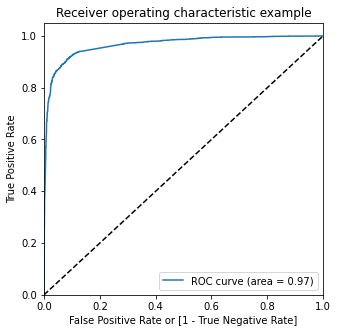

In [214]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

- Our ROC curve is closer to 1 i.e, area = 0.97 and it is good representation of predictive model.

## Optimal Cutoff Point

- Optimal cutoff probability is that prob where we get balanced sensitivity and specificity


In [215]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.974346,5425,1,1,1,1,1,1,1,1,1,1,1
1,0,0.101596,8586,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000296,4631,0,1,0,0,0,0,0,0,0,0,0
3,0,0.003186,4464,0,1,0,0,0,0,0,0,0,0,0
4,0,0.069848,2058,0,1,0,0,0,0,0,0,0,0,0


In [216]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377337  1.000000  0.000000
0.1   0.1  0.787556  0.973516  0.674864
0.2   0.2  0.907157  0.929944  0.893347
0.3   0.3  0.912798  0.914139  0.911986
0.4   0.4  0.914732  0.895344  0.926482
0.5   0.5  0.919246  0.871850  0.947968
0.6   0.6  0.920535  0.847074  0.965053
0.7   0.7  0.914410  0.813755  0.975408
0.8   0.8  0.893939  0.743272  0.985245
0.9   0.9  0.867505  0.663392  0.991199


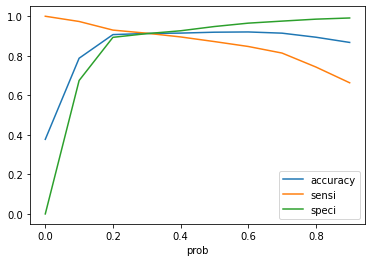

In [217]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the above plot we can say that the optimum point seems to be 0.3.

In [218]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.974346,5425,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.101596,8586,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000296,4631,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.003186,4464,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.069848,2058,0,1,0,0,0,0,0,0,0,0,0,0


In [219]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9127981947130883

In [220]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3523,  340],
       [ 201, 2140]])

In [221]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [222]:
# Sensitivity

TP / float(TP+FN)

0.9141392567278941

In [223]:
# Specificity

TN / float(TN+FP)

0.9119855034946932

### Train Data Set

- Accuracy    : 91.28
- Sensitivity : 91.41
- Specificity : 91.20

In [224]:
# false postive rate - predicting conversion when customer does not have converted

FP/ float(TN+FP)

0.08801449650530675

In [225]:
# Positive predictive value

TP / float(TP+FP)

0.8629032258064516

In [226]:
# Negative predictive value

TN / float(TN+ FN)

0.9460257787325457

## Precision and Recall

In [227]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3662,  201],
       [ 300, 2041]])

### Precision
TP / TP + FP

In [228]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9103479036574487

### Recall
TP / TP + FN

In [229]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8718496369073045

In [230]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9103479036574487

In [231]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8718496369073045

## Precision and recall tradeoff

In [232]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6199    0
 6200    0
 6201    0
 6202    0
 6203    0
 Name: Converted, Length: 6204, dtype: int64, 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6199    0
 6200    0
 6201    1
 6202    0
 6203    0
 Name: predicted, Length: 6204, dtype: int64)

In [233]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

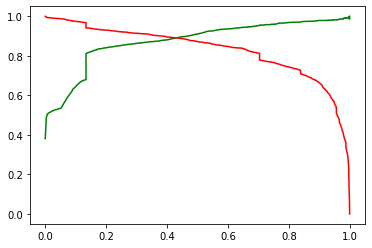

In [234]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [235]:
# create a list of numeric variable

num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [236]:
# Fit on the data

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous Source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Unspecified,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Miscellaneous_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
8788,0,0,0,1.053161,1.647288,2.058365,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7813,0,0,0,-0.024078,-0.402525,0.421959,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2403,0,0,1,3.925797,1.733538,0.312865,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7243,0,0,1,0.694082,1.203193,0.149225,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5363,0,0,1,0.335002,2.067527,0.967428,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [237]:
df_test.describe()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Miscellaneous Source,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Specialization_Unspecified,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Miscellaneous_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,2659.000000,2659.0,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.00000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.0,2659.0,2659.000000,2659.000000,2659.000000,2659.000000,2659.0,2659.000000,2659.000000,2659.000000,2659.0
mean,0.078601,0.0,0.379842,0.037502,-0.007492,0.019115,0.519368,0.060549,0.004513,0.004513,0.326439,0.002633,0.206093,0.124483,0.04701,0.015419,0.012035,0.035728,0.028582,0.398646,0.015043,0.107559,0.023317,0.062053,0.286950,0.039112,0.005265,0.011659,0.016924,0.462580,0.021813,0.009026,0.004889,0.024069,0.366679,0.001128,0.001504,0.019932,0.901843,0.074464,0.022189,0.039112,0.055284,0.013163,0.078601,0.124859,0.591200,0.027078,0.064686,0.159082,0.641219,0.062053,0.083114,0.048138,0.037608,0.079729,0.008650,0.006393,0.019556,0.000376,0.330575,0.0,0.0,0.001128,0.351260,0.020308,0.028582,0.0,0.231290,0.003761,0.006769,0.0
std,0.269166,0.0,0.485439,1.043239,0.997560,1.004592,0.499719,0.238546,0.067040,0.067040,0.468998,0.051251,0.404574,0.330194,0.21170,0.123237,0.109061,0.185645,0.166660,0.489712,0.121748,0.309881,0.150937,0.241298,0.452423,0.193899,0.072384,0.107364,0.129010,0.498692,0.146099,0.094593,0.069764,0.153293,0.481989,0.033577,0.038764,0.

In [238]:
y_test = df_test.pop('Converted')
X_test = df_test

In [239]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
8788,1.647288,0,0,0,0,0,0,1,0,0,1,0,1
7813,-0.402525,0,0,0,0,0,0,0,0,0,0,0,0
2403,1.733538,0,0,0,0,0,0,0,1,0,0,0,1
7243,1.203193,0,0,0,0,1,0,0,0,0,0,0,0
5363,2.067527,0,0,0,0,0,0,0,1,0,0,0,1


In [240]:
X_test_sm = sm.add_constant(X_test)

#### Making predictions on the test set


In [241]:
y_test_pred = res.predict(X_test_sm)

In [242]:
y_test_pred[:10]

8788    0.036518
7813    0.055808
2403    0.998166
7243    0.999615
5363    0.998743
3918    0.299433
3345    0.133912
917     0.060612
7732    0.060258
1702    0.061445
dtype: float64

In [243]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [244]:
# Let's see the head

y_pred_1.head()

,0
8788,0.036518
7813,0.055808
2403,0.998166
7243,0.999615
5363,0.998743


In [245]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [246]:
# Putting ProspectID to index

y_test_df['Prospect ID'] = y_test_df.index

In [247]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [248]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [249]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8788,0.036518
1,0,7813,0.055808
2,1,2403,0.998166
3,1,7243,0.999615
4,1,5363,0.998743


In [250]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [251]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,0,8788,0.036518
1,0,7813,0.055808
2,1,2403,0.998166
3,1,7243,0.999615
4,1,5363,0.998743


In [252]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [253]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,8788,0,0.036518
1,7813,0,0.055808
2,2403,1,0.998166
3,7243,1,0.999615
4,5363,1,0.998743


In [254]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [255]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,8788,0,0.036518,0
1,7813,0,0.055808,0
2,2403,1,0.998166,1
3,7243,1,0.999615,1
4,5363,1,0.998743,1


In [256]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9112448288830387

In [257]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1534,  115],
       [ 121,  889]])

In [258]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [259]:
# 'Sensitivity'

TP / float(TP+FN)

0.8801980198019802

In [260]:
# 'Specificity'
TN / float(TN+FP)

0.9302607640994542

## Train Data Set

- Accuracy    : 91.28
- Sensitivity : 91.41
- Specificity : 91.20

## Test Data

- Accuracy    : 91.12
- Sensitivity : 88.02
- Specificity : 93.03

## It is good to notice that our both train and test data are having almost close values of the above factors.

##	Data Analysis :

-	Now that we have been provided with data and which is not completely clean and needs to be treated with following steps and procedures.
-	Basically data contains around 9000 data points and the data information provides us that it has numerous null values inside it. By notice, we also know that the customers who had not selected any of the options while filling the application are left as ‘Select’. Which is also considered as Null values.
-	So, in order to treat/Clean that we had to convert first all the select values to null values. Later, we had to involve in dealing with individual variables to check its null values and its rating against the total number of variables. Finally, to drop or replace the null values with the most suitable value of that variable. 
-	Further, we started with getting our hands on data by executing Exploratory Data Analysis (EDA). Here, we plotted plots for almost each of the variables to visualize the information compounded in it.
-	We had to bucket most of the least counted values in the variables to the most common or into other set of that variable. Which will help is minimizing the mass of the data for further analysis.
-	Then we dropped the insignificant variables assuming that it has nothing much to do inside our analysis.
-	We created dummy variables for getting all our set of values contained in the variables.
-	Then we split the entire data into 0.7 and 0.3 for train data and test data respectively. 
-	We also used standard scalar tool to fit and transform the train data variables had a different ranges.
-	Since the number of feature variables were very huge and it was not practically possible to deal with all the variables manually. Hence we decided to use feature RFE selection mode to select top 15 reasonable variables. 
-	With the selected feature variables, we usually dealt with it manually by looking into stats summary and Variance Inflation Factor (VIF). 
-	We dropped very few variables which had p-values more than 0.05 and VIF more than 5.
-	Along with that we had also taken care of model accuracy by monitoring it every time.
-	We created confusion matrix and calculated various factors such as sensitivity, specificity, false positive rate, positive and negative predictive values.
-	Our train set had around 90% for all accuracy, sensitivity and specificity.
-	Alongside we also plotted ROC curve where the curve was close to one by attaining 0.97 and which represents very good predictive model.
-	Each time the metrics were calculated and accuracy were monitored for the variations.
-	The prediction on the test data was made and the sensitivity, specificity and accuracy from the confusion matrix were again very close to 90%.

###	The Final Model Statistics Summary :

-	$Based on our final model, following feature variables are having positive impact in the line of business. Those are as follows :$

-     Feature Variables &	(coef)
- Tags_Closed by Horizzon	(8.8727)
- Tags_Lost to EINS	(8.7737)
- Tags_Will revert after reading the email	(3.976)
- Lead Source_Welingak Website	(3.7757)
- Tags_Busy	(3.6679)
- Last Notable Activity_SMS Sent	(2.7326)
- Lead Origin_Lead Add Form	(2.474)
- Total Time Spent on Website	(1.1325)
- Lead Source_Olark Chat	(1.036)



-	$Based on our final model, few feature variables are also having positive impact in the line of business. Those are as follows :$

-   Feature Variables	& (coef)
- Tags_Ringing	(-1.9883)
- Tags_switched off	(-2.0853)
- Lead Quality_Not Sure	(-3.5101)
- Lead Quality_Worst	(-3.5338)

####	$Considering all the above factors X-Education Company has higher possibilities to attain to reach all the potential buyers to convince the buyers and convert the sales.$
****************************
